In [ ]:
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = Image.open('/content/drive/MyDrive/Semestre 8/Visión por computador /Clase 4/paisaje-og.webp')

In [ ]:
image_array = np.array(image)
image_2D = image_array.reshape(-1, 3)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(image_2D)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [ ]:
segmented_image = kmeans.cluster_centers_[kmeans.labels_]
segmented_image = segmented_image.reshape(image_array.shape)
segmented_image = segmented_image.astype(np.uint8)

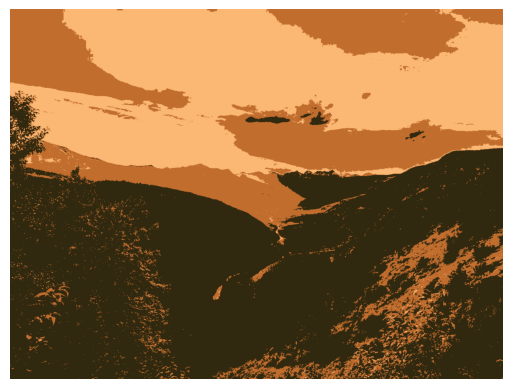

In [ ]:
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

In [ ]:
# Implementar K-Means con OpenCV
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
# Ensure image_2D is of type float32 and has the correct shape
image_2D_float = image_2D.astype(np.float32)
_, labels, centers = cv2.kmeans(image_2D_float, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros a enteros
centers = np.uint8(centers)

# Reemplazar cada pixel con su centroide
segmented_image = centers[labels.flatten()]
# Assuming 'image_array' is the original NumPy array of the image
segmented_image = segmented_image.reshape(image_array.shape)

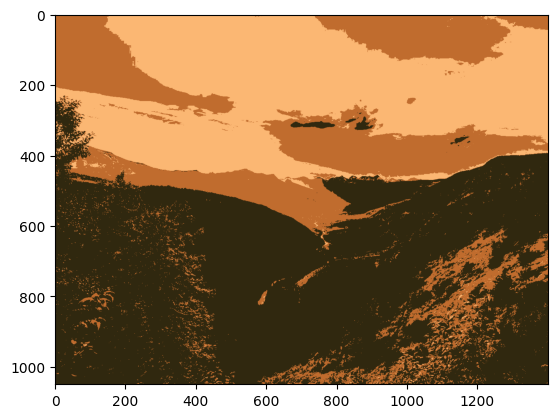

In [ ]:
# Mostrar la imagen segmentada
plt.imshow(segmented_image)
plt.show()

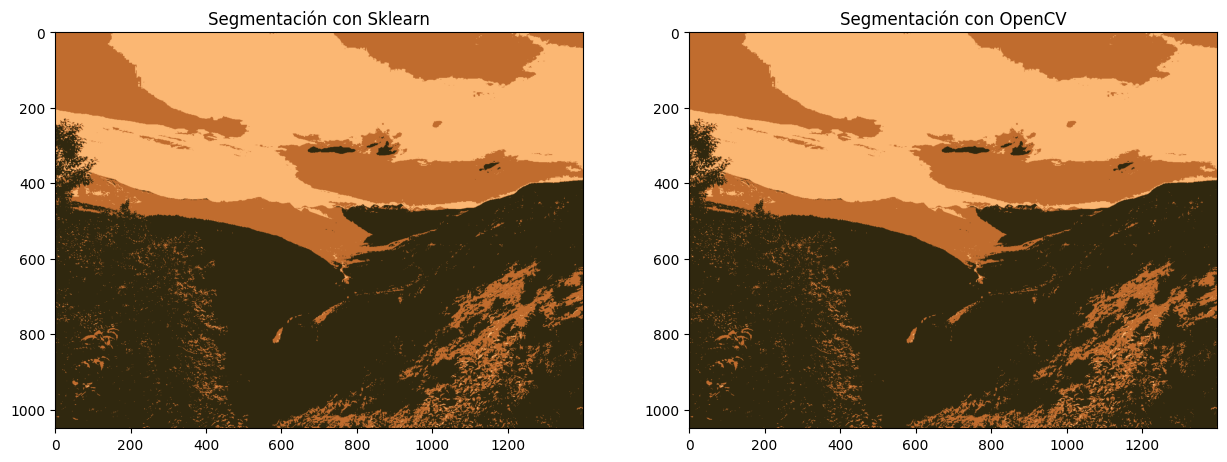

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].imshow(segmented_image)
ax[0].set_title('Segmentación con Sklearn')

ax[1].imshow(segmented_image)
ax[1].set_title('Segmentación con OpenCV')

plt.show()